In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/history-of-mass-shootings-in-the-usa/History_of_Mass_Shootings_in_the_USA.csv



![Typing SVG](https://readme-typing-svg.herokuapp.com?size=32&color=F73078&width=900&height=45&lines=About+Our+Dataset)

<a><img src="https://images.unsplash.com/photo-1617492717241-8692c23b6039?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80" style="border-radius:1%"></a>


**Mass shootings are incidents involving multiple victims of firearm-related violence. Studies indicate that the rate at which public mass shootings occur has tripled since 2011. Between 1982 and 2011, a mass shooting occurred roughly once every 200 days. However, between 2011 and 2014, that rate has accelerated greatly with at least one mass shooting occurring every 64 days in the United States. Post 2014, this rate has further increased and is still on the rise.**

**Higher accessibility and ownership of guns has been cited as a reason for the high rate of mass shootings. The USA has the highest per-capita gun ownership in the world with 120.5 firearms per 100 people.**

![Typing SVG](https://readme-typing-svg.herokuapp.com?size=32&color=F73078&width=900&height=45&lines=Import+Libraries+and+Load+Dataset)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.io as pio

In [3]:
df = pd.read_csv('../input/history-of-mass-shootings-in-the-usa/History_of_Mass_Shootings_in_the_USA.csv')

![Typing SVG](https://readme-typing-svg.herokuapp.com?size=32&color=F73078&width=900&height=45&lines=Explore+Dataset)

**The dataset contains a list of all the mass shootings from 1924 to 2022**

* Date: Date of the shooting
* City: City where the shooting occured
* State: State where the shooting occured
* Dead: Number of casualties
* Injured: Number of people injured
* Total: Dead + Injured
* Description: Description of the shooting

In [4]:
df.head(5)

,Date,City,State,Dead,Injured,Total,Description
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par..."


![Typing SVG](https://readme-typing-svg.herokuapp.com?size=32&color=F73078&width=900&height=45&lines=Data+Preprocessing)

### Taking care of Null values!

<AxesSubplot:>

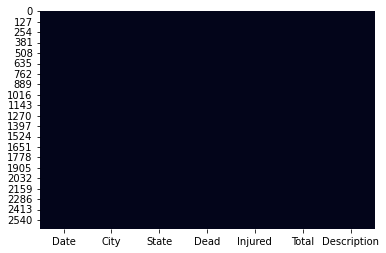

In [5]:
# Plot to see null values in our data
sns.heatmap(df.isnull(), cbar=False)

In [6]:
# Null Value Percentage Per column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Date,Date,0.000000
City,City,0.000000
State,State,0.188893
Dead,Dead,0.000000
Injured,Injured,0.000000
Total,Total,0.000000
Description,Description,0.000000


### There is very tiny amount of null values in our dataset so we will remove thoes and move ahead

In [7]:
df.dropna(axis=0,inplace=True)

### Date column should be of type date and time so we will convert it intro datetime type. Also we are going to create three now columns of year, month, day of week and day from date column.

In [8]:
df.dtypes

Date           object
City           object
State          object
Dead            int64
Injured         int64
Total           int64
Description    object
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_name()

In [11]:
# Combine Year to form intervals
df['Interval'] = (10 * (df['year'] // 10)).astype(str) + 's'

In [12]:
df.dtypes

Date           datetime64[ns]
City                   object
State                  object
Dead                    int64
Injured                 int64
Total                   int64
Description            object
year                    int64
month                   int64
day                     int64
day_of_week            object
Interval               object
dtype: object

In [13]:
df.sample(5)

,Date,City,State,Dead,Injured,Total,Description,year,month,day,day_of_week,Interval
2313,2018-06-17,Macon,Georgia,1,3,4,A teenager was killed and three other people w...,2018,6,17,Sunday,2010s
44,2022-06-25,Minneapolis,Minnesota,0,4,4,After multiple fights broke out during a gathe...,2022,6,25,Saturday,2020s
2578,1993-12-14,Aurora,Colorado,4,1,5,"Aurora, Colorado, Chuck E. Cheese shooting: Th...",1993,12,14,Tuesday,1990s
231,2022-04-03,Parkin and Wynne,Arkansas,2,2,4,"A man opened fire inside a home in Parkin, kil...",2022,4,3,Sunday,2020s
1428,2020-06-30,Dayton,Ohio,0,4,4,Three men and one women were all wounded in a ...,2020,6,30,Tuesday,2020s


In [14]:
for elem in df['State'].unique():
    print(elem)

Illinois
Florida
Minnesota
Ohio
Indiana
New York
Louisiana
Massachusetts
Virginia
Missouri
Wisconsin
California
Colorado
South Carolina
Arizona
Washington
Texas
North Carolina
Mississippi
Kentucky
New Jersey
Pennsylvania
Tennessee
Georgia
Michigan
Washington D.C.
Maryl
Utah
Nevada
Nebraska
West Virginia
Oklahoma
Alabama
Puerto Rico
Arkansas
Oregon
Kansas
Iowa
Connecticut
Hawaii
New Mexico
United States Virgin Isls
South Dakota
Idaho
Delaware
Rhode Isl
New Hampshire
Alaska
Peoria
Maine
Montana
Wyoming
District of Columbia
Northern Mariana Isls
Samson
Colorado Springs
Lancaster County
Robinson Township
Pennsylvania  Jenkins Township


In [15]:
for elem in df['Interval'].unique():
    print(elem)

2020s
2010s
2000s
1990s
1980s
1970s
1960s
1950s
1940s
1930s
1920s


![Typing SVG](https://readme-typing-svg.herokuapp.com?size=32&color=F73078&width=900&height=45&lines=Exploratory+Data+Analysis)

In [16]:
df.sample(5)

,Date,City,State,Dead,Injured,Total,Description,year,month,day,day_of_week,Interval
212,2022-04-15,Stockton,California,2,2,4,A group of people approached another group and...,2022,4,15,Friday,2020s
870,2021-05-08,Citrus Heights,California,0,4,4,Four people were wounded in the parking lot of...,2021,5,8,Saturday,2020s
1024,2021-02-05,Bolivar,Mississippi,3,1,4,A shooting at a club left three people dead an...,2021,2,5,Friday,2020s
2608,1981-05-07,Salem,Oregon,5,18,23,Oregon Museum Tavern shooting: The perpetrator...,1981,5,7,Thursday,1980s
1660,2020-01-26,Hartsville,South Carolina,3,6,9,Three people were fatally shot and four others...,2020,1,26,Sunday,2020s


## Create State Code Colomn from State Names for our Map

In [17]:
state_code = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [18]:
df['state_code'] = df.State.replace(state_code)
df.head(5)

,Date,City,State,Dead,Injured,Total,Description,year,month,day,day_of_week,Interval,state_code
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...,2022,7,7,Thursday,2020s,IL
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...,2022,7,6,Wednesday,2020s,FL
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...,2022,7,6,Wednesday,2020s,IL
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...,2022,7,6,Wednesday,2020s,MN
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par...",2022,7,5,Tuesday,2020s,OH


## Mass Shootings Trend with Year Passings

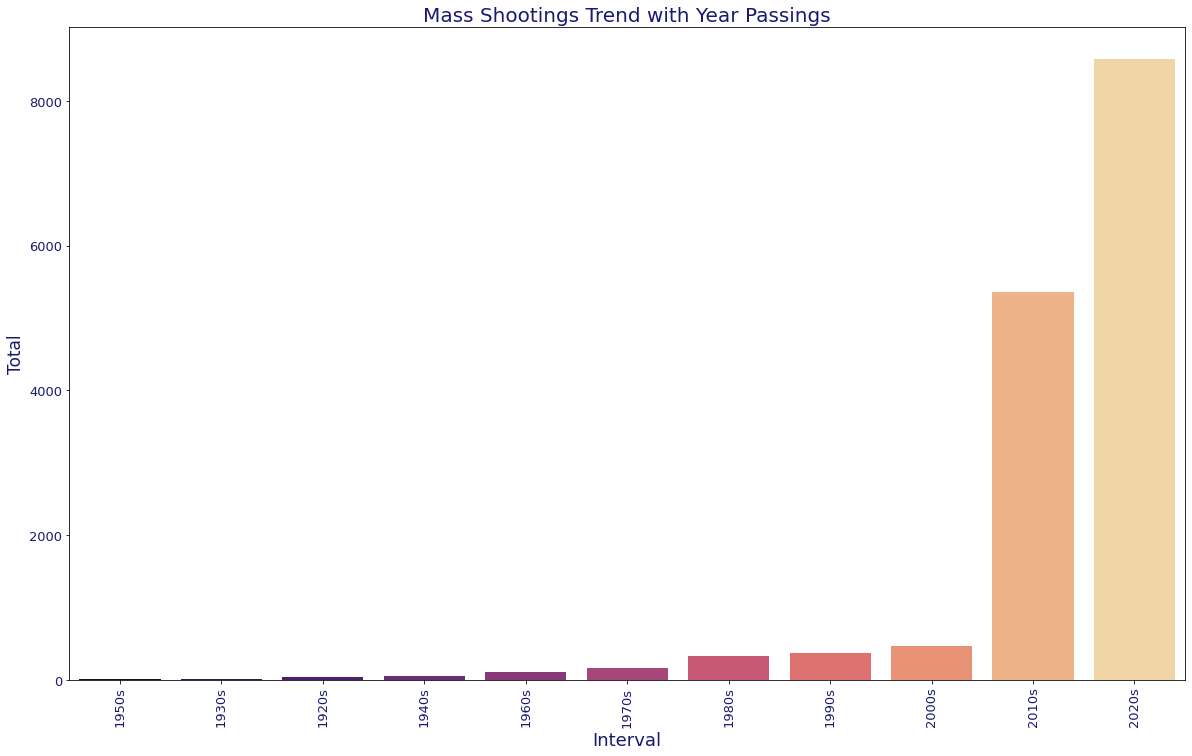

In [19]:
data = df
interval_df = data[['Interval','Total']].groupby(['Interval']).sum().reset_index().sort_values('Total', ascending = True)

plt.figure(figsize=(20,12))
ax = sns.barplot(x='Interval', y='Total', data=interval_df, palette='magma')
plt.xticks(rotation=90,fontsize=13, color='midnightblue')
plt.yticks(fontsize=13, color='midnightblue')
plt.xlabel('Interval', size = 18, color='midnightblue')
plt.ylabel('Total', size = 17 , color='midnightblue')
plt.title('Mass Shootings Trend with Year Passings', size = 20, color='midnightblue')
plt.show()

## Mass Shootings Map of USA states

In [20]:
fig = px.choropleth(df,
                    locations='state_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Total',
                    range_color = [1,40],
                    template = 'plotly_dark'
                    )

fig.update_layout(
    title_text = 'Mass Shootings Map of USA states',
)


fig.show()

## Top 15 states of USA w.r.t Mass Shootings

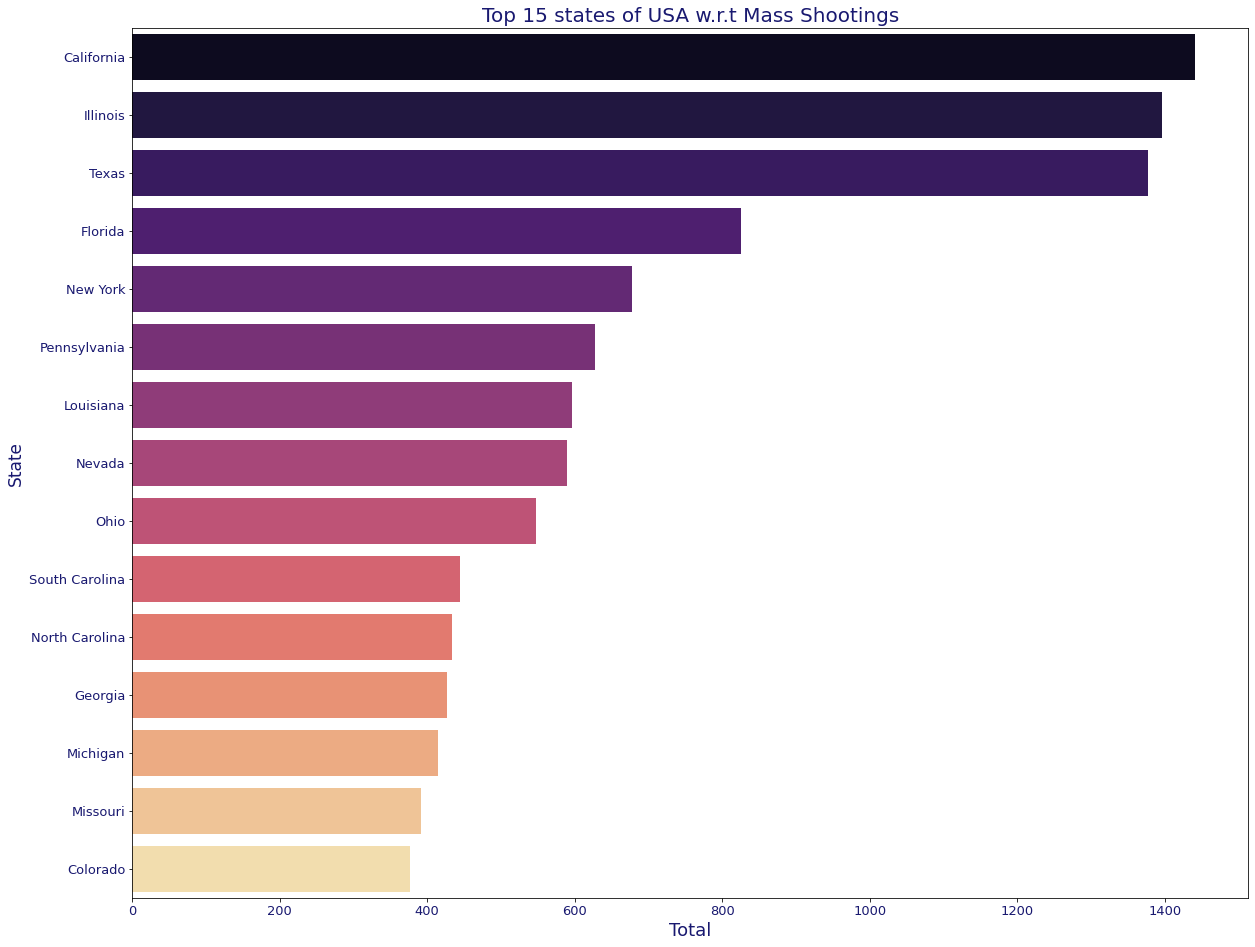

In [21]:
data = df
state_df = data[['State','Total']].groupby(['State']).sum().reset_index().sort_values('Total', ascending = False)
state_dfa = state_df.head(15) #change the number to view more states

plt.figure(figsize=(20,16))
ax = sns.barplot(x='Total', y='State', data=state_dfa, palette='magma')
plt.xticks(fontsize=13, color='midnightblue')
plt.yticks(fontsize=13, color='midnightblue')
plt.xlabel('Total', size = 18, color='midnightblue')
plt.ylabel('State', size = 17 , color='midnightblue')
plt.title('Top 15 states of USA w.r.t Mass Shootings', size = 20, color='midnightblue')
plt.show()

In [22]:
data = df
city_df = data[['City','Total']].groupby(['City']).sum().reset_index().sort_values('Total', ascending = False)
city_dfa = city_df.head(15) #change the number to view more states

In [23]:
city_dfa

,City,Total
138,Chicago,983
592,Paradise,479
611,Philadelphia,402
547,New York City,344
381,Houston,250
52,Baltimore,234
545,New Orleans,198
843,Washington D.C.,180
578,Orlando,163
466,Los Angeles,159


## Top 15 Cities of USA w.r.t Mass Shootings

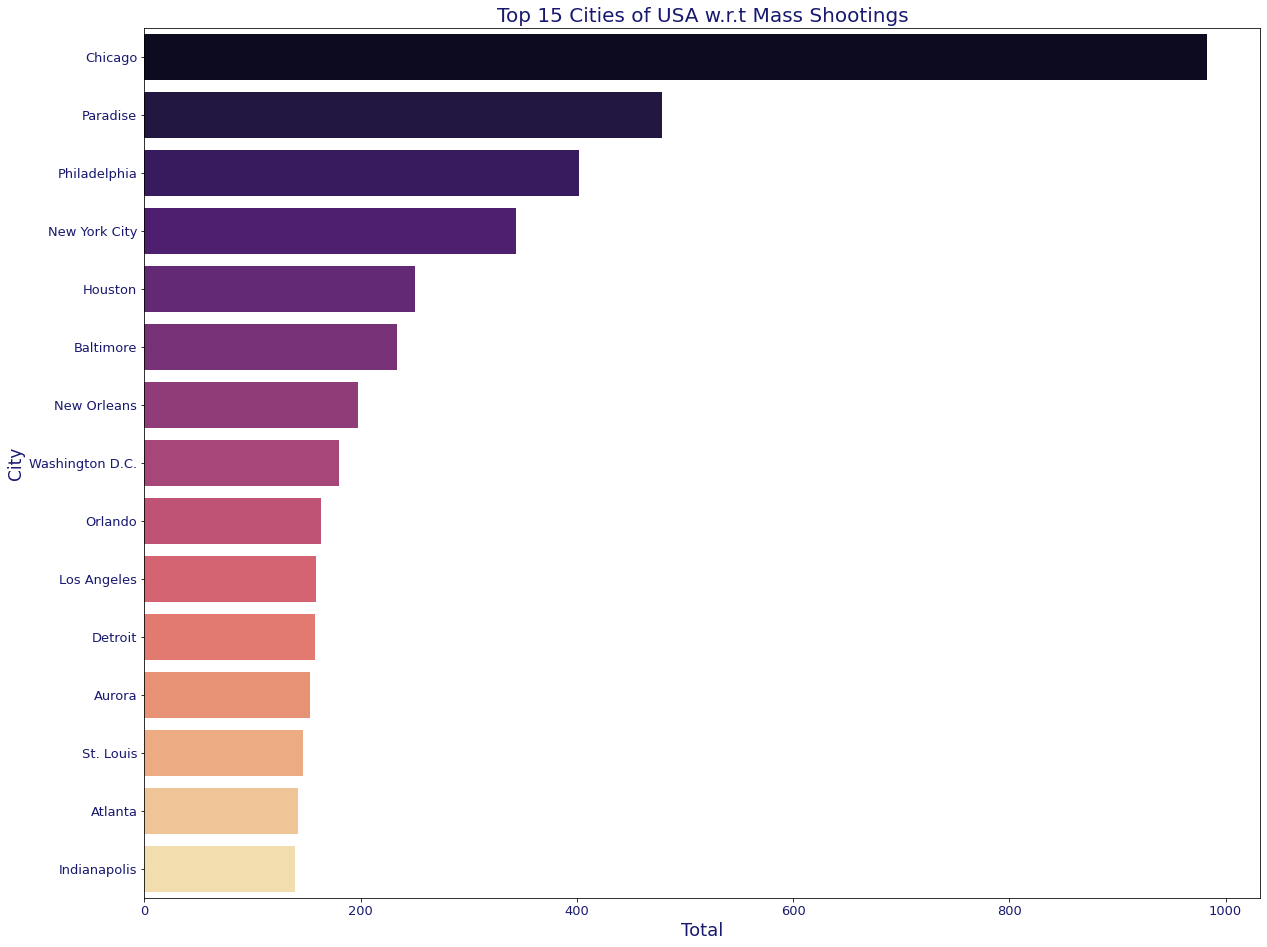

In [24]:
data = df
city_df = data[['City','Total']].groupby(['City']).sum().reset_index().sort_values('Total', ascending = False)
city_dfa = city_df.head(15) #change the number to view more states

plt.figure(figsize=(20,16))
ax = sns.barplot(x='Total', y='City', data=city_dfa, palette='magma')
plt.xticks(fontsize=13, color='midnightblue')
plt.yticks(fontsize=13, color='midnightblue')
plt.xlabel('Total', size = 18, color='midnightblue')
plt.ylabel('City', size = 17 , color='midnightblue')
plt.title('Top 15 Cities of USA w.r.t Mass Shootings', size = 20, color='midnightblue')
plt.show()

In [25]:
df.head(5)

,Date,City,State,Dead,Injured,Total,Description,year,month,day,day_of_week,Interval,state_code
0,2022-07-07,Chicago,Illinois,0,4,4,Four people were wounded in a drive-by shootin...,2022,7,7,Thursday,2020s,IL
1,2022-07-06,Tampa,Florida,0,4,4,Four people were shot at an intersection in th...,2022,7,6,Wednesday,2020s,FL
2,2022-07-06,Chicago,Illinois,0,4,4,Four people were shot after three men got out ...,2022,7,6,Wednesday,2020s,IL
3,2022-07-06,St. Cloud,Minnesota,0,4,4,An argument in an alleyway escalated into a sh...,2022,7,6,Wednesday,2020s,MN
4,2022-07-05,Youngstown,Ohio,1,3,4,"Four people were shot, one fatally, in the par...",2022,7,5,Tuesday,2020s,OH


## Scatter Plot of cross Injured & Dead

In [26]:
fig = px.scatter(df, x="Injured", y="Dead", color="Dead",
                 size='Dead', hover_data=['City', 'State', 'year'], template = 'plotly_dark', 
                 title='Scatter Plot of cross Injured & Dead')
fig.show()

## WORDCLOUD

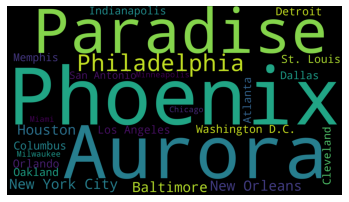

In [27]:
from wordcloud import WordCloud 

City_dfa_ = city_df.head(25).sort_values('Total', ascending = True)

data = City_dfa_['City'].value_counts().to_dict()
wc = WordCloud(width =1920, 
        height =1080, background_color= 'black').generate_from_frequencies(data)

plt.imshow(wc)
plt.axis('off')
plt.show()

![](https://images.unsplash.com/photo-1533601017-dc61895e03c0?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80)